# Question #2 Analysis

#### This project uses scraped data from ESPN in conjunction with a key statistics csv file found on Kaggle to analyze how attendance trends have changed over time along with what ket statistics effect attendance numbers.#

#### Attendence Data: https://www.espn.com/nfl/attendance/_/year/20XX (with the XX depending on what year)
#### Statistics Data: https://www.kaggle.com/datasets/nickcantalupa/nfl-team-data-2003-2023

#### This notebook contains the analysis for question #2 in our report

In [3]:
# import required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
# Read in Dataframe

merged_df = pd.read_csv('final_df')

In [5]:
# Create the Top 10 Dataframe

# Calculate the overall average attendance for each team & filter to the top 10
avg_attendance_per_team = merged_df.groupby('team')['Average Fan Attendance'].mean()

sorted_avg_attendance = avg_attendance_per_team.sort_values(ascending=False)

top_10_teams = sorted_avg_attendance.head(10)

top_10_teams_df = top_10_teams.reset_index()

In [6]:
# Create the Bottom 10 Dataframe

# Using the average attendance from above get the bottom 10
sorted_avg_attendance = avg_attendance_per_team.sort_values(ascending=True)

bottom_10_teams = sorted_avg_attendance.head(10)

bottom_10_teams_df = bottom_10_teams.reset_index()

#### Analysis Question #2: Is there a strong correlation between the winning percentage of a team and the attendance for that year? Does there seem to be higher attendance when teams are winning more? 

In [8]:
# Calculate the correlation between 'win_loss_perc' and 'Average Fan Attendance'
correlation = merged_df[['win_loss_perc', 'Average Fan Attendance']].corr()
print(correlation)

                        win_loss_perc  Average Fan Attendance
win_loss_perc                1.000000                0.203889
Average Fan Attendance       0.203889                1.000000


In [9]:
# Run a correlation test
correlation_coefficient, p_value = stats.pearsonr(merged_df['win_loss_perc'], merged_df['Average Fan Attendance'])

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

Pearson Correlation Coefficient: 0.2038890998700793
P-value: 6.825092940678541e-05
The correlation is statistically significant.


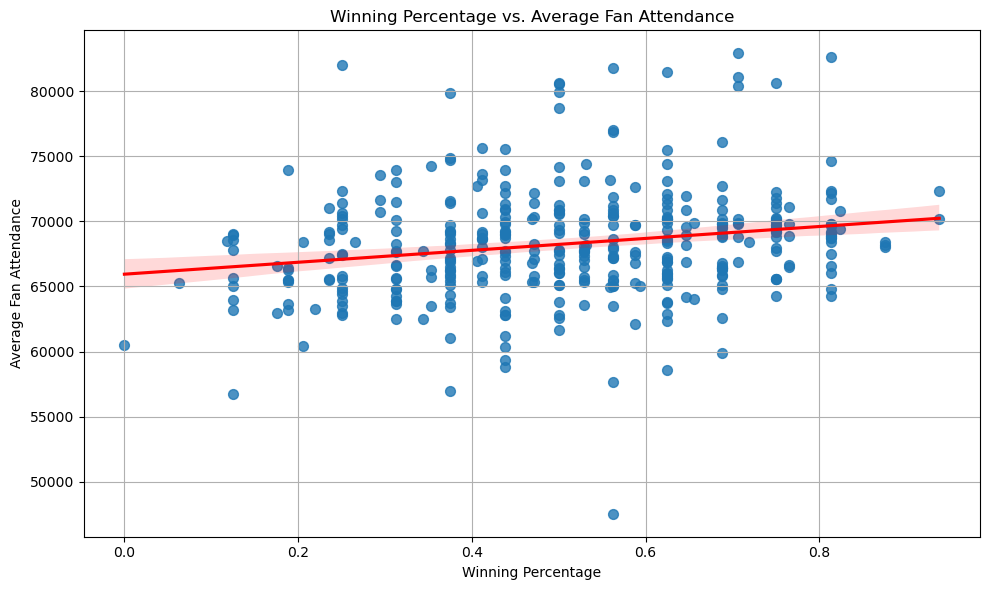

In [10]:
# Create the scatter plot with a trend line (regression line)
plt.figure(figsize=(10, 6))
sns.regplot(data=merged_df, x='win_loss_perc', y='Average Fan Attendance', scatter_kws={'s': 50}, line_kws={'color': 'red'})

plt.title('Winning Percentage vs. Average Fan Attendance')
plt.xlabel('Winning Percentage')
plt.ylabel('Average Fan Attendance')

plt.grid(True)
plt.tight_layout()
plt.show()

#### Top 10 Analysis

In [12]:
top_10_teams_df = merged_df[merged_df['team'].isin(top_10_teams.index)]

In [13]:
# merged the top 10 dataframe to include win_loss_perc

top_10_teams_df = top_10_teams_df[['team', 'year', 'win_loss_perc', 'Average Fan Attendance']]

In [14]:
# Calculate the correlation between 'win_loss_perc' and 'Average Fan Attendance'

correlation = top_10_teams_df[['win_loss_perc', 'Average Fan Attendance']].corr()
print(correlation)

                        win_loss_perc  Average Fan Attendance
win_loss_perc                1.000000                0.080263
Average Fan Attendance       0.080263                1.000000


In [15]:
# Run Pearson correlation test

correlation_coefficient, p_value = stats.pearsonr(top_10_teams_df['win_loss_perc'], top_10_teams_df['Average Fan Attendance'])

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

Pearson Correlation Coefficient: 0.08026292209747805
P-value: 0.36400230056592997
The correlation is not statistically significant.


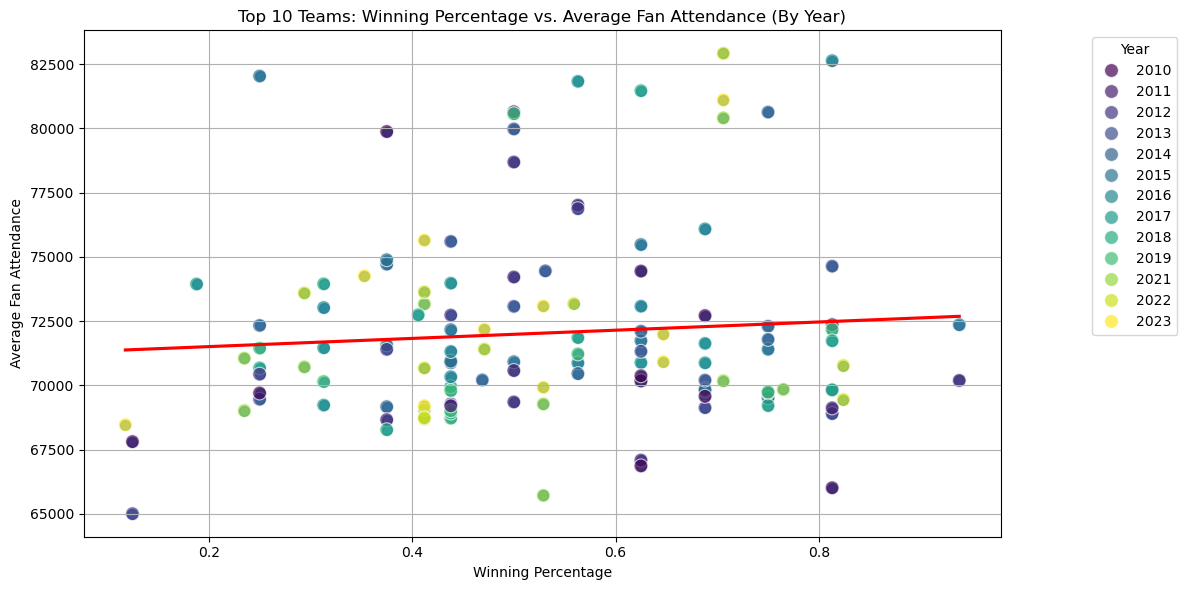

In [16]:
# Create the scatter plot with a trend line, and color points by year

plt.figure(figsize=(12, 6))
sns.regplot(
    data=top_10_teams_df, 
    x='win_loss_perc', 
    y='Average Fan Attendance', 
    scatter_kws={'s': 50}, 
    line_kws={'color': 'red'}, 
    ci=None,
    fit_reg=True
)

sns.scatterplot(
    data=top_10_teams_df,
    x='win_loss_perc',
    y='Average Fan Attendance',
    hue='year',
    palette='viridis',
    legend='full',
    alpha=0.7,
    s=100,
)

plt.title('Top 10 Teams: Winning Percentage vs. Average Fan Attendance (By Year)')
plt.xlabel('Winning Percentage')
plt.ylabel('Average Fan Attendance')
plt.legend(title='Year', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.grid(True)
plt.tight_layout()

plt.show()

#### Bottom 10 Analysis

In [18]:
bottom_10_teams_df = merged_df[merged_df['team'].isin(bottom_10_teams.index)]

In [19]:
# merged the top 10 dataframe to include win_loss_perc

bottom_10_teams_df = pd.merge(bottom_10_teams_df, merged_df[['team', 'year', 'win_loss_perc']], on='team', how='left')

In [20]:
bottom_10_teams_df.columns

Index(['Unnamed: 0', 'team', 'year_x', 'Average Fan Attendance',
       'Fan Attendance', 'wins', 'losses', 'win_loss_perc_x', 'total_yards',
       'turnovers', 'year_y', 'win_loss_perc_y'],
      dtype='object')

In [21]:
# Calculate the correlation between 'win_loss_perc' and 'Average Fan Attendance'

correlation = bottom_10_teams_df[['win_loss_perc_x', 'Average Fan Attendance']].corr()
print(correlation)

                        win_loss_perc_x  Average Fan Attendance
win_loss_perc_x                1.000000                0.231637
Average Fan Attendance         0.231637                1.000000


In [22]:
# Run Pearson correlation test

correlation_coefficient, p_value = stats.pearsonr(bottom_10_teams_df['win_loss_perc_x'], bottom_10_teams_df['Average Fan Attendance'])

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

Pearson Correlation Coefficient: 0.231637140990764
P-value: 4.382004013424608e-20
The correlation is statistically significant.


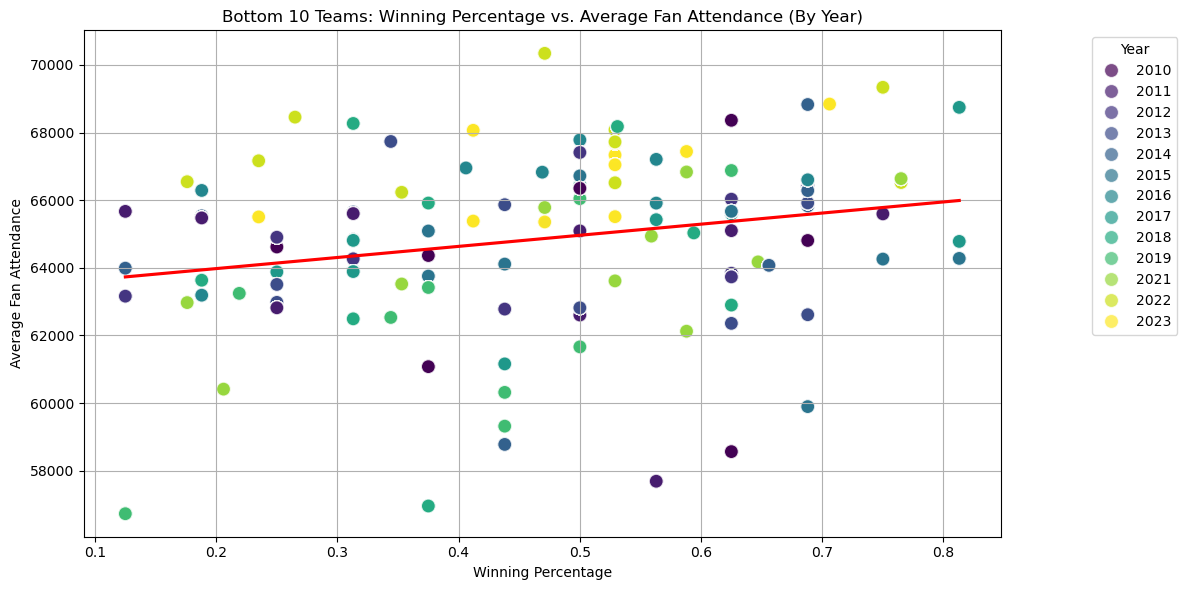

In [23]:
# Create the scatter plot with a trend line, and color points by year

plt.figure(figsize=(12, 6))
sns.regplot(
    data=bottom_10_teams_df, 
    x='win_loss_perc_x', 
    y='Average Fan Attendance', 
    scatter_kws={'s': 50}, 
    line_kws={'color': 'red'}, 
    ci=None,
    fit_reg=True
)

sns.scatterplot(
    data=bottom_10_teams_df,
    x='win_loss_perc_x',
    y='Average Fan Attendance',
    hue='year_x',
    palette='viridis',
    legend='full',
    alpha=0.7,
    s=100,
)

plt.title('Bottom 10 Teams: Winning Percentage vs. Average Fan Attendance (By Year)')
plt.xlabel('Winning Percentage')
plt.ylabel('Average Fan Attendance')
plt.legend(title='Year', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.grid(True)
plt.tight_layout()

plt.show()

#### Analysis Question #3: What team has seen the highest attendance over the last 3 years? Specifically, what are the three teams that have seen the best attendance over the last three years?  

In [25]:
# Ensure the year column is in datetime format
merged_df['year'] = pd.to_datetime(merged_df['year'], format='%Y')

In [26]:
# Filter for the last 3 years

last_3_years = merged_df[merged_df['year'].dt.year >= 2021]

In [27]:
team_attendance = last_3_years.groupby('team')['Fan Attendance'].sum().reset_index()

In [28]:
team_attendance = team_attendance.sort_values(by='Fan Attendance', ascending=False)

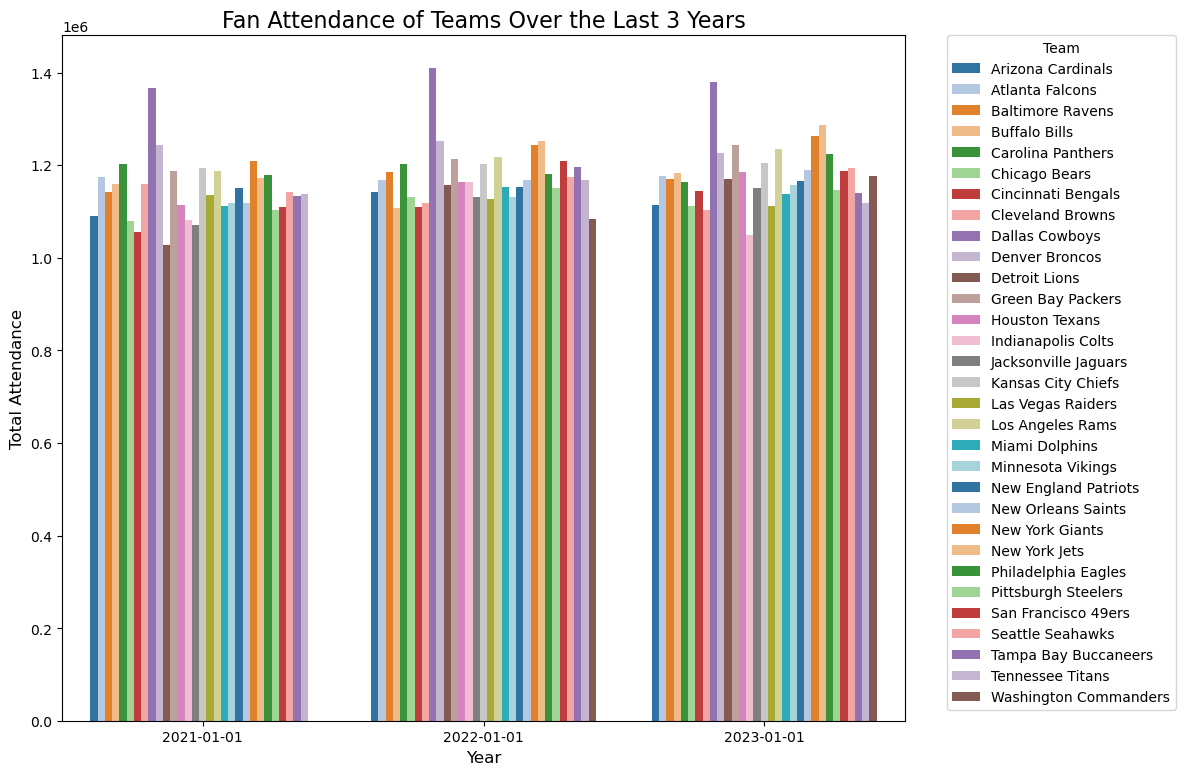

In [29]:
# Vizulize the Data
plt.figure(figsize=(12, 8))

sns.barplot(data=last_3_years, x='year', y='Fan Attendance', hue='team', palette='tab20')

plt.title('Fan Attendance of Teams Over the Last 3 Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Attendance', fontsize=12)

plt.legend(title='Team', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

plt.tight_layout()

plt.show()


In [30]:
top_3_teams = team_attendance.head(3)

In [31]:
print("Top 3 Teams with the Highest Attendance over the Last 3 Years:")
print(top_3_teams)

Top 3 Teams with the Highest Attendance over the Last 3 Years:
               team  Fan Attendance
8    Dallas Cowboys         4155172
9    Denver Broncos         3721886
22  New York Giants         3714210


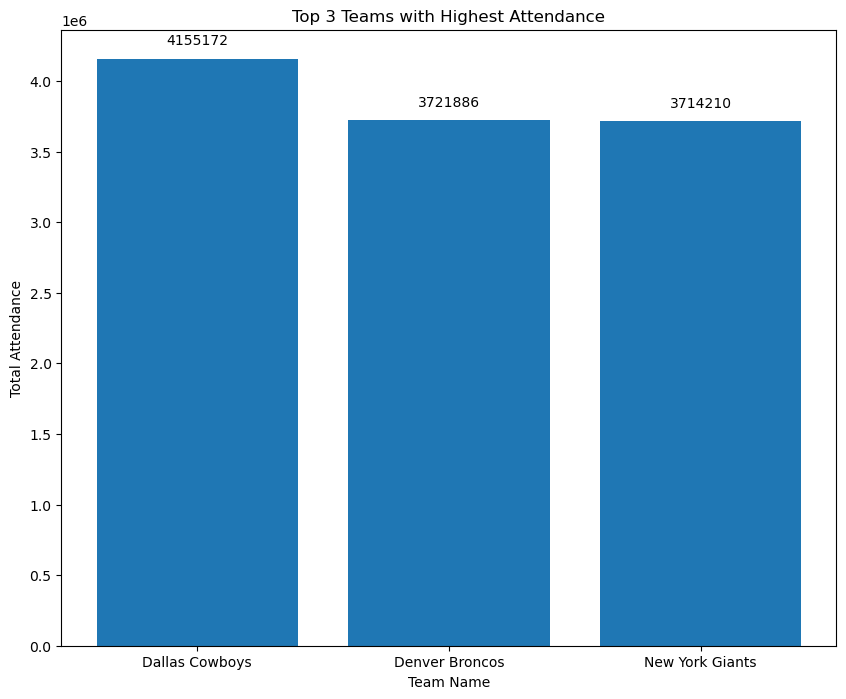

In [32]:
# Vizulize the top 3 teams

plt.figure(figsize=(10,8))

bars = plt.bar(top_3_teams['team'], top_3_teams['Fan Attendance'], color='skyblue')

plt.bar(top_3_teams['team'], top_3_teams['Fan Attendance'])
plt.title('Top 3 Teams with Highest Attendance')
plt.xlabel('Team Name')
plt.ylabel('Total Attendance')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02 * yval,
             round(yval, 0), ha='center', va='bottom')
plt.show()

#### Analysis Question #4: Is there a strong correlation between turnovers and attendance in that year? 

In [34]:
# Calculate the correlation between 'turnovers' and 'Average Fan Attendance'
correlation = merged_df[['turnovers', 'Average Fan Attendance']].corr()
print(correlation)

                        turnovers  Average Fan Attendance
turnovers                1.000000               -0.102379
Average Fan Attendance  -0.102379                1.000000


In [35]:
# Run a correlation test
correlation_coefficient, p_value = stats.pearsonr(merged_df['turnovers'], merged_df['Average Fan Attendance'])

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

Pearson Correlation Coefficient: -0.10237871259802803
P-value: 0.04727786706306499
The correlation is statistically significant.


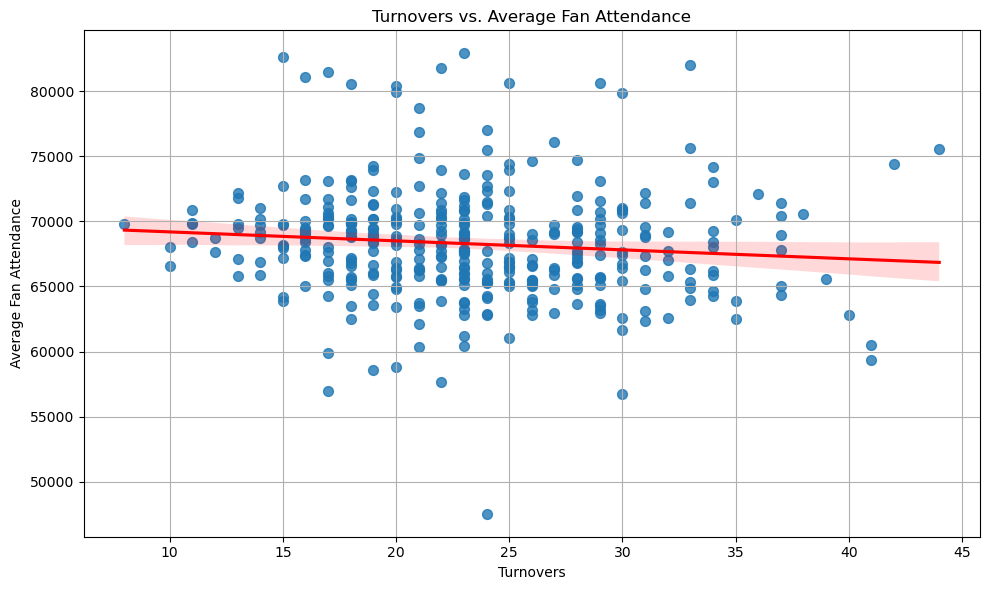

In [36]:
# Create the scatter plot with a trend line (regression line)
plt.figure(figsize=(10, 6))
sns.regplot(data=merged_df, x='turnovers', y='Average Fan Attendance', scatter_kws={'s': 50}, line_kws={'color': 'red'})

plt.title('Turnovers vs. Average Fan Attendance')
plt.xlabel('Turnovers')
plt.ylabel('Average Fan Attendance')

plt.grid(True)
plt.tight_layout()
plt.show()

#### Top 10 Analysis

In [38]:
top_10_teams_df = merged_df[merged_df['team'].isin(top_10_teams.index)]

In [39]:
# merged the top 10 dataframe to include win_loss_perc

top_10_teams_df = top_10_teams_df[['team', 'year', 'win_loss_perc', 'Average Fan Attendance','turnovers']]

In [40]:
# Calculate the correlation between Turnovers and Fan Attendance

correlation = top_10_teams_df[['turnovers', 'Average Fan Attendance']].corr()
print(correlation)

                        turnovers  Average Fan Attendance
turnovers                1.000000                0.049692
Average Fan Attendance   0.049692                1.000000


In [41]:
# Run Pearson correlation test

correlation_coefficient, p_value = stats.pearsonr(top_10_teams_df['turnovers'], top_10_teams_df['Average Fan Attendance'])

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

Pearson Correlation Coefficient: 0.049691512238200286
P-value: 0.574493946694463
The correlation is not statistically significant.


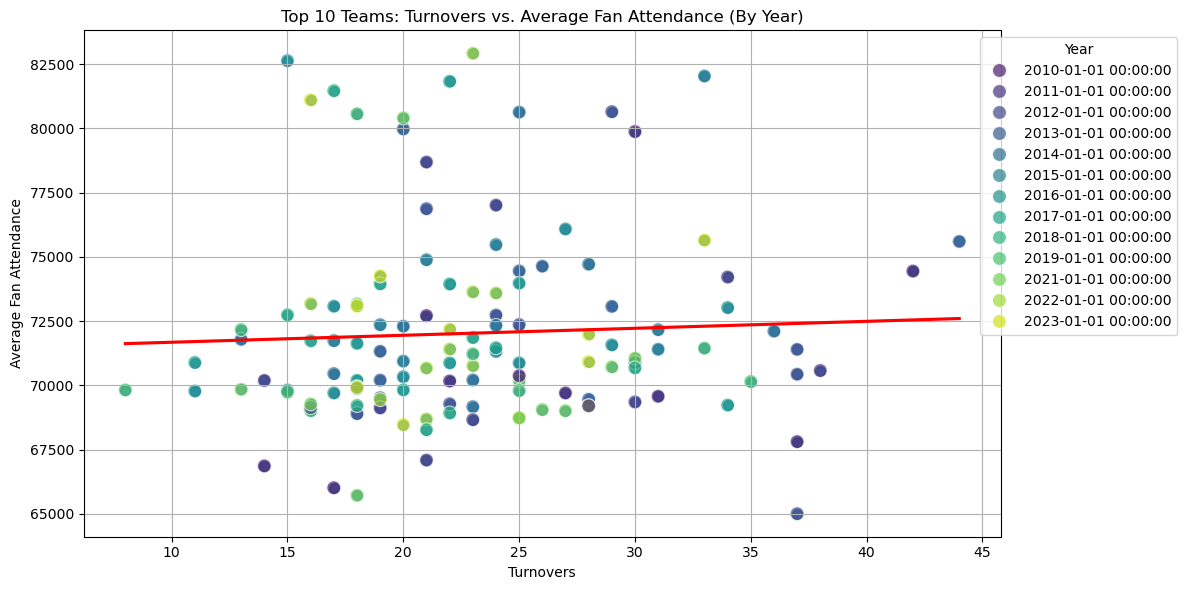

In [42]:
# Create the scatter plot with a trend line, and color points by year

plt.figure(figsize=(12, 6))
sns.regplot(
    data=top_10_teams_df, 
    x='turnovers', 
    y='Average Fan Attendance', 
    scatter_kws={'s': 50}, 
    line_kws={'color': 'red'}, 
    ci=None,
    fit_reg=True
)

sns.scatterplot(
    data=top_10_teams_df,
    x='turnovers',
    y='Average Fan Attendance',
    hue='year',
    palette='viridis',
    legend='full',
    alpha=0.7,
    s=100,
)

plt.title('Top 10 Teams: Turnovers vs. Average Fan Attendance (By Year)')
plt.xlabel('Turnovers')
plt.ylabel('Average Fan Attendance')
plt.legend(title='Year', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.grid(True)
plt.tight_layout()

plt.show()

#### Bottom 10 Analysis

In [44]:
bottom_10_teams_df = merged_df[merged_df['team'].isin(bottom_10_teams.index)]

In [45]:
# merged the top 10 dataframe to include win_loss_perc

bottom_10_teams_df = bottom_10_teams_df[['team', 'year', 'win_loss_perc', 'Average Fan Attendance','turnovers']]

In [46]:
bottom_10_teams_df.columns

Index(['team', 'year', 'win_loss_perc', 'Average Fan Attendance', 'turnovers'], dtype='object')

In [47]:
# Calculate the correlation between 'win_loss_perc' and 'Average Fan Attendance'

correlation = bottom_10_teams_df[['turnovers', 'Average Fan Attendance']].corr()
print(correlation)

                        turnovers  Average Fan Attendance
turnovers                1.000000               -0.109858
Average Fan Attendance  -0.109858                1.000000


In [48]:
# Run Pearson correlation test

correlation_coefficient, p_value = stats.pearsonr(bottom_10_teams_df['turnovers'], bottom_10_teams_df['Average Fan Attendance'])

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

Pearson Correlation Coefficient: -0.10985841174297864
P-value: 0.2322975001279122
The correlation is not statistically significant.


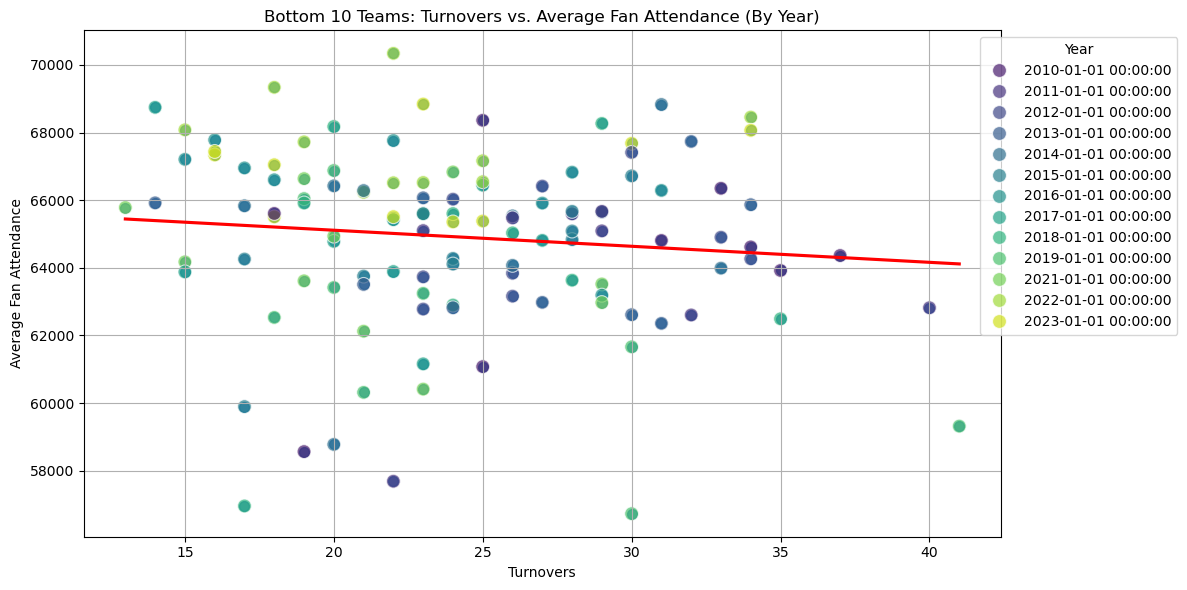

In [49]:
# Create the scatter plot with a trend line, and color points by year

plt.figure(figsize=(12, 6))
sns.regplot(
    data=bottom_10_teams_df, 
    x='turnovers', 
    y='Average Fan Attendance', 
    scatter_kws={'s': 50}, 
    line_kws={'color': 'red'}, 
    ci=None,
    fit_reg=True
)

sns.scatterplot(
    data=bottom_10_teams_df,
    x='turnovers',
    y='Average Fan Attendance',
    hue='year',
    palette='viridis',
    legend='full',
    alpha=0.7,
    s=100,
)

plt.title('Bottom 10 Teams: Turnovers vs. Average Fan Attendance (By Year)')
plt.xlabel('Turnovers')
plt.ylabel('Average Fan Attendance')
plt.legend(title='Year', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.grid(True)
plt.tight_layout()

plt.show()